In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [5]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

## Counterplot to display the count per category of Legit vs Fraud.

<AxesSubplot:xlabel='quality', ylabel='count'>

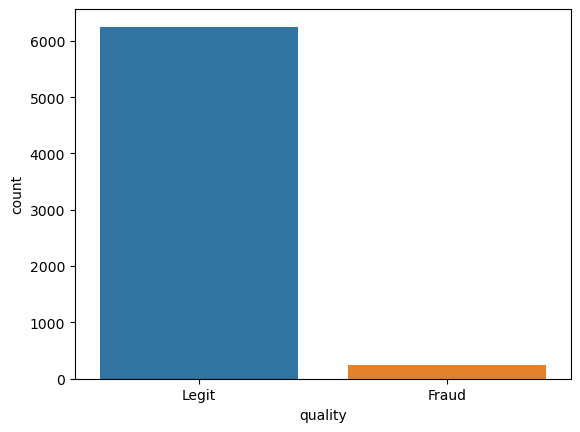

In [6]:
sns.countplot(x='quality',data=df)

## Fraud and Legit between Red wine and White wine

<AxesSubplot:xlabel='type', ylabel='count'>

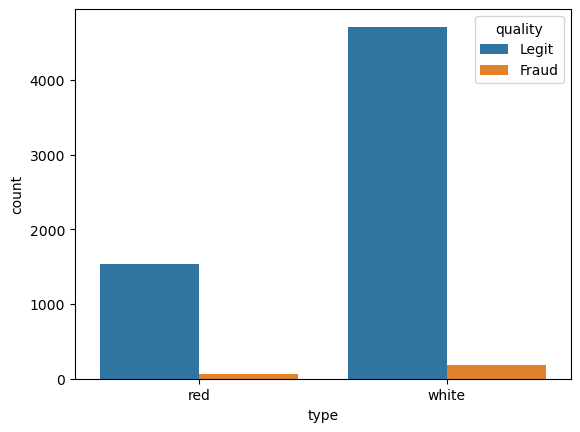

In [7]:
sns.countplot(hue='quality',data=df,x='type')

In [8]:
reds = df[df['type']=='red']

In [9]:
whites = df[df['type']=='white']

In [10]:
100*len(reds[reds['quality'] == 'Fraud'])/len(reds)

3.9399624765478425

In [11]:
100*len(whites[whites['quality'] == 'Fraud'])/len(whites)

3.736218864842793

## Calculate the correlation between the various features and the 'quality' column

In [12]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

<AxesSubplot:>

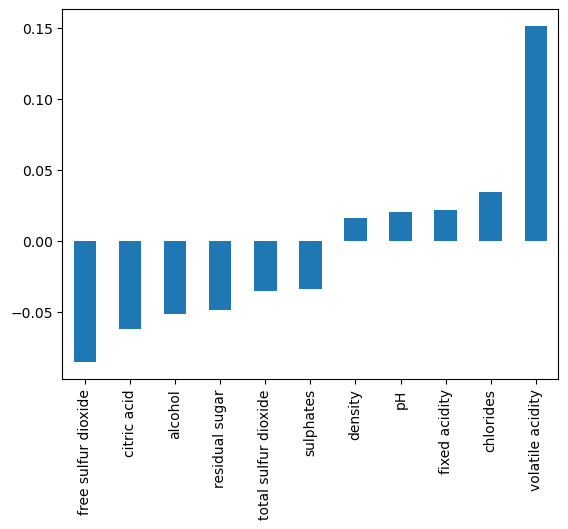

In [13]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

## Correlation values to Fraudlent wine

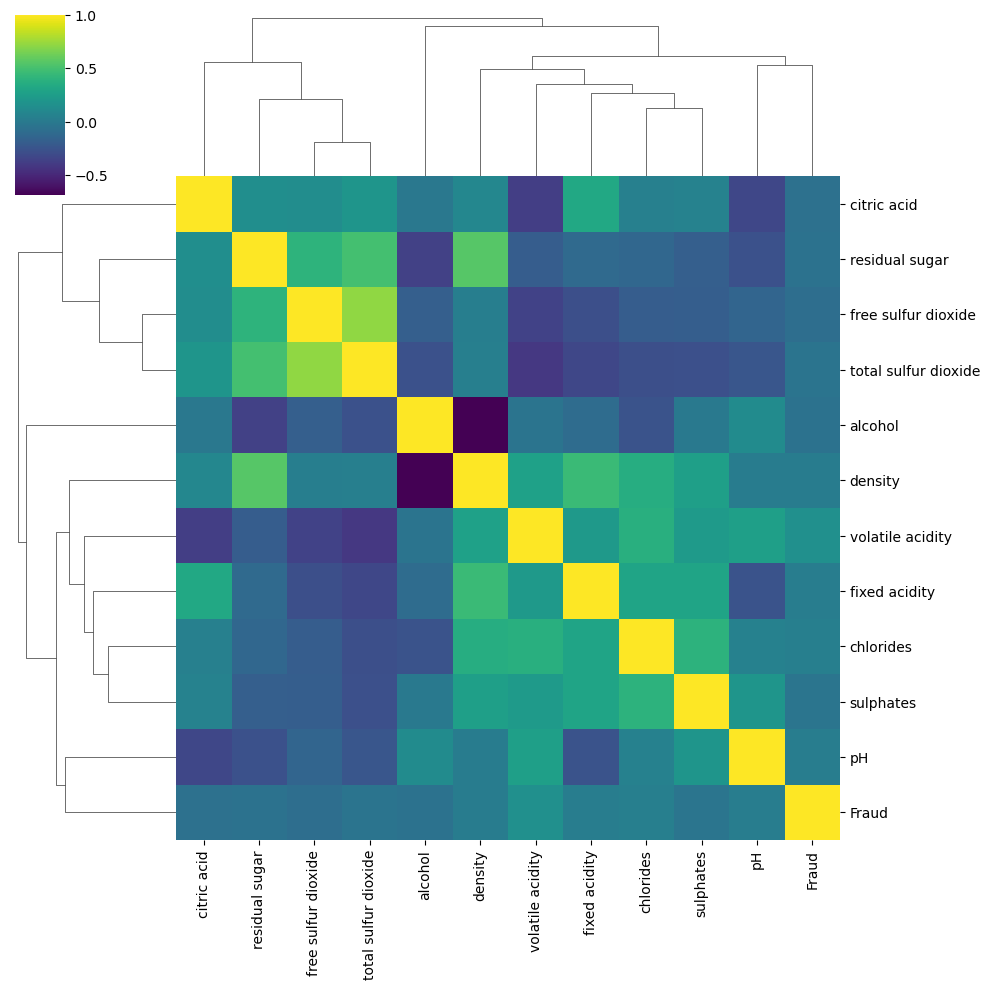

In [14]:
sns.clustermap(df.corr(),cmap='viridis')

## Machine learning model

In [15]:
df = df.drop('Fraud',axis=1)

In [16]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [17]:
X = df.drop('quality',axis=1)

In [18]:
y = df['quality']

## Seperate out the data into X features and y target label ("qaulity" column)

In [19]:
X = df.drop('quality',axis=1)

In [20]:
y = df['quality']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Scale the data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)

In [26]:
scales_X_test = scaler.transform(X_test)